In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from sklearn.model_selection import train_test_split
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer
import numpy as np # linear algebra
import pandas as pd
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import GlobalMaxPooling1D, Conv1D, Dense, Embedding, Dropout,MaxPooling1D,LSTM
import matplotlib.pyplot as plt
import numpy as np # linear algebra
from keras.callbacks import EarlyStopping

from keras import regularizers
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report, f1_score
import os
for dirname, _, filenames in os.walk('../input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import tensorflow 
from tensorflow.python.lib.io import file_io


Using TensorFlow backend.
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarn

../input/finaldata/YouTube_Dadvar_2014.csv
../input/finaldata/glove.6B.100d.txt


/opt/conda/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/conda/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/conda/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/conda/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:544: FutureWa

In [2]:
data = pd.read_csv('../input/finaldata/YouTube_Dadvar_2014.csv')

In [3]:
data.head()

,UserIndex,Comments,Number of Comments,Number of Subscribers,Membership Duration,Number of Uploads,Profanity in UserID,Age,Class,Unnamed: 9,...,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37
0,X1,Does N.e.bodyelse Hear her Crazy ass Screamin ...,10,1,3,3,0,15,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,X2,There are so many things that are incorrect wi...,3,0,6,5,0,31,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,X3,3:26 hahah my boyfriend showed this song to me...,7,0,3,5,0,43,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,X2218,dick beyonce fuck y a ass hole you are truely ...,34,0,3,5,0,44,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,X5,DongHaeTaemin and Kai ;A; luhansehun and bacon...,11,173,5,5,0,21,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
data.shape

(3464, 38)

In [5]:
data.ndim

2

In [6]:
data.drop(data.columns[data.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
data.shape

(3464, 9)

In [7]:
data.dtypes

UserIndex                object
Comments                 object
Number of Comments        int64
Number of Subscribers     int64
Membership Duration       int64
Number of Uploads         int64
Profanity in UserID       int64
Age                       int64
Class                     int64
dtype: object

In [8]:
data.isnull().any()

UserIndex                False
Comments                 False
Number of Comments       False
Number of Subscribers    False
Membership Duration      False
Number of Uploads        False
Profanity in UserID      False
Age                      False
Class                    False
dtype: bool

In [9]:
data.columns

Index(['UserIndex', 'Comments', 'Number of Comments', 'Number of Subscribers',
       'Membership Duration', 'Number of Uploads', 'Profanity in UserID',
       'Age', 'Class'],
      dtype='object')

In [10]:
data_dupli = data.drop_duplicates()
data=data_dupli
data.describe()

,Number of Comments,Number of Subscribers,Membership Duration,Number of Uploads,Profanity in UserID,Age,Class
count,3464.000000,3464.000000,3464.000000,3464.000000,3464.000000,3464.000000,3464.00000
mean,15.452367,304.318995,3.714781,10.288395,0.113164,24.879042,0.12067
std,10.862517,15520.532319,1.392837,28.646525,0.316839,13.286361,0.32579
min,1.000000,0.000000,2.000000,1.000000,0.000000,13.000000,0.00000
25%,6.000000,0.000000,3.000000,5.000000,0.000000,18.000000,0.00000
50%,14.000000,2.000000,3.000000,5.000000,0.000000,21.000000,0.00000
75%,23.000000,7.000000,4.000000,5.000000,0.000000,27.000000,0.00000
max,50.000000,912377.000000,9.000000,820.000000,1.000000,112.000000,1.00000


In [11]:
from sklearn.preprocessing import LabelEncoder
data['Class']=data['Class'].astype(str)
le = LabelEncoder()
data['Class'] = le.fit_transform(data['Class'])

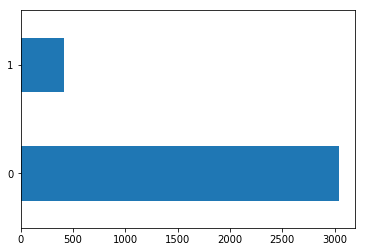

In [12]:
data['Class'].value_counts().plot(kind='barh')

In [13]:
import kernelprocess

df = kernelprocess.processing(data)
df.head()

,Comments,Class
0,do nebodyels hear crazi as screamin hoe every...,0
1,there mani thing incorrect comment unbeliev g...,0
2,hahah boyfriend show song me tooo be seizur o...,1
3,dick beyonc fuck as hole trueli dog bitch pha...,1
4,donghaetaemin kai a luhansehun bacon xd taemi...,0


In [14]:
from sklearn.utils import shuffle
file = shuffle(df, random_state=3)

In [15]:
Y = pd.DataFrame(file['Class'])
X = pd.DataFrame(file['Comments'])

In [16]:
def plot_model_history(model_history):
        fig, axs = plt.subplots(1,2,figsize=(15,5))
        # summarize history for accuracy
        axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
        axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
        axs[0].set_title('Model Accuracy')
        axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
        axs[0].legend(['train', 'test'], loc='best')
        # summarize history for loss
        axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
        axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
        axs[1].set_title('Model Loss')
        axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
        axs[1].legend(['train', 'test'], loc='best')
        plt.show()

In [17]:
tokenizer = Tokenizer(num_words=None, split=' ',lower=False)
tokenizer.fit_on_texts(X['Comments'].values)
x = tokenizer.texts_to_sequences(X['Comments'].values)
wordindex = tokenizer.word_index
vocab_size = len(wordindex) + 1
token = pad_sequences(x, padding  = 'post', maxlen = 2303) #max comment length

In [18]:
import keras.backend as K
def mean_pred(y_true, y_pred):
    return K.mean(y_pred)


# load whole embedding into memory
print('Indexing word vectors.')
    
embeddings_index = {}
f = file_io.FileIO('../input/finaldata/glove.6B.100d.txt', mode='r')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()
    
print('Found %s word vectors.' % len(embeddings_index))
#emb_dim could be a parameter
    
all_embs = np.stack(embeddings_index.values())
emb_mean = all_embs.mean() 
emb_std = all_embs.std() 
emb_mean,emb_std
emb_dim=100
embedding_matrix = np.random.normal(emb_mean, emb_std, (vocab_size, emb_dim ))
for word, i in wordindex.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None: 
        embedding_matrix[i] = embedding_vector


Indexing word vectors.
Found 400000 word vectors.


/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3249: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  if (await self.run_code(code, result,  async_=asy)):


In [19]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
cv = KFold(n_splits=4, random_state=42)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 2303, 100)         4123200   
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 2299, 134)         67134     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 766, 134)          0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 762, 114)          76494     
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 254, 114)          0         
_________________________________________________________________
dense_1 (Dense)              (None, 254, 20)           2300      
_________________________________________________________________
dropout_1 (Dropout)          (None, 254, 20)           0         
__________

Train on 4556 samples, validate on 866 samples
Epoch 1/10
4556/4556 [==============================] - 20s 4ms/step - loss: 1.5110 - acc: 0.5468 - val_loss: 1.4242 - val_acc: 0.2575
Epoch 2/10
4556/4556 [==============================] - 17s 4ms/step - loss: 1.1457 - acc: 0.5878 - val_loss: 1.0758 - val_acc: 0.5624
Epoch 3/10
4556/4556 [==============================] - 17s 4ms/step - loss: 0.9006 - acc: 0.6569 - val_loss: 0.8301 - val_acc: 0.8199
Epoch 4/10
4556/4556 [==============================] - 17s 4ms/step - loss: 0.7551 - acc: 0.6956 - val_loss: 0.9216 - val_acc: 0.6074
Epoch 5/10
4556/4556 [==============================] - 17s 4ms/step - loss: 0.6248 - acc: 0.7634 - val_loss: 0.6511 - val_acc: 0.8256
Epoch 6/10
4556/4556 [==============================] - 17s 4ms/step - loss: 0.4635 - acc: 0.8472 - val_loss: 0.7788 - val_acc: 0.7644
Epoch 7/10
4556/4556 [==============================] - 17s 4ms/step - loss: 0.3545 - acc: 0.8982 - val_loss: 0.5544 - val_acc: 0.8360
Epoch 8/

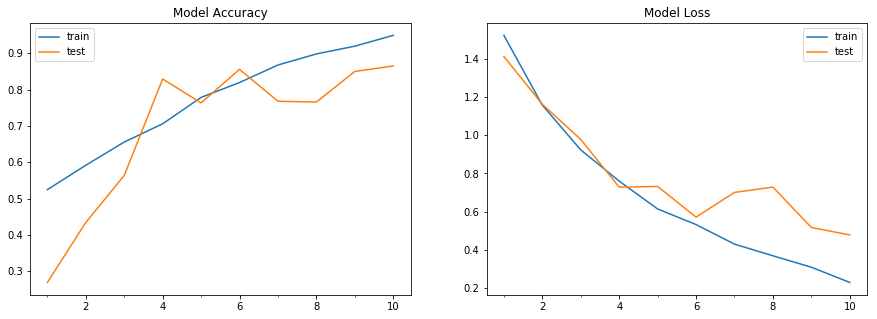

-----RandomOverSampling-----
CNN-LSTM Accuracy Score ->  86.48960739030022
              precision    recall  f1-score   support

           0       0.89      0.97      0.93       760
           1       0.33      0.10      0.16       106

    accuracy                           0.86       866
   macro avg       0.61      0.54      0.54       866
weighted avg       0.82      0.86      0.83       866

[[738  22]
 [ 95  11]]


In [20]:
#def CNNmodel(x_train, x_test, y_train, y_test, vocab_size, embedding_matrix):
y=Y['Class'].values  
cvscores = []
for train, test in cv.split(token):  
    #print("TRAIN:", train, "Test:", test)
    Xtrain, Xtest = token[train], token[test]
    Ytrain, Ytest = y[train], y[test]
    #ramdomOverSample
    from imblearn.over_sampling import RandomOverSampler
    ros = RandomOverSampler()
    x_ros, y_ros = ros.fit_sample(Xtrain, Ytrain)   
    
    seed = 126
    np.random.seed(seed)
    model = Sequential()
    model.add(Embedding(vocab_size, 100, weights = [embedding_matrix], trainable=False, input_length = x_ros.shape[1]))
    model.add(Conv1D(134, 5, activation='tanh'))
    model.add(MaxPooling1D(pool_size=3))
    model.add(Conv1D(114, 5, activation='tanh'))
    model.add(MaxPooling1D(pool_size=3))
    model.add(Dense(20, activation='tanh', kernel_regularizer = regularizers.l2(0.02)))
    model.add(Dropout(0.5))
    model.add(LSTM(94,return_sequences=True, activation='tanh'))#return_sequences=True
    model.add(Dropout(0.5))
    model.add(GlobalMaxPooling1D())
    model.add(Dropout(0.5))
    model.add(Dense(10,activation = 'tanh', kernel_regularizer = regularizers.l2(0.02)))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    print(model.summary())
    batch_size = 110
    epochs = 10
    
    model_history = model.fit(x_ros, y_ros, validation_data=(Xtest, Ytest), epochs=epochs, batch_size=batch_size, verbose=1 ,callbacks=[EarlyStopping(monitor='val_acc',patience=4, mode='max', min_delta = 0.001)])
    CLSTM = model.predict_classes(Xtest)
    
scores = model.evaluate(Xtest, Ytest, verbose=0)
cvscores.append(scores[1] * 100)
plot_model_history(model_history)
print("-----RandomOverSampling-----")
print("CNN-LSTM Accuracy Score -> ",(np.mean(cvscores)))
print(classification_report(Ytest, CLSTM))
print(confusion_matrix(Ytest,CLSTM))


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 2303, 100)         4123200   
_________________________________________________________________
conv1d_9 (Conv1D)            (None, 2299, 134)         67134     
_________________________________________________________________
max_pooling1d_9 (MaxPooling1 (None, 766, 134)          0         
_________________________________________________________________
conv1d_10 (Conv1D)           (None, 762, 114)          76494     
_________________________________________________________________
max_pooling1d_10 (MaxPooling (None, 254, 114)          0         
_________________________________________________________________
dense_13 (Dense)             (None, 254, 20)           2300      
_________________________________________________________________
dropout_13 (Dropout)         (None, 254, 20)           0         
__________

Train on 4556 samples, validate on 866 samples
Epoch 1/10
4556/4556 [==============================] - 20s 4ms/step - loss: 1.5118 - acc: 0.5380 - val_loss: 1.4170 - val_acc: 0.2875
Epoch 2/10
4556/4556 [==============================] - 17s 4ms/step - loss: 1.1515 - acc: 0.5939 - val_loss: 1.1813 - val_acc: 0.3233
Epoch 3/10
4556/4556 [==============================] - 17s 4ms/step - loss: 0.9015 - acc: 0.6521 - val_loss: 0.8125 - val_acc: 0.8522
Epoch 4/10
4556/4556 [==============================] - 17s 4ms/step - loss: 0.8995 - acc: 0.5799 - val_loss: 0.9191 - val_acc: 0.3580
Epoch 5/10
4556/4556 [==============================] - 17s 4ms/step - loss: 0.7804 - acc: 0.6304 - val_loss: 0.8635 - val_acc: 0.4319
Epoch 6/10
4556/4556 [==============================] - 17s 4ms/step - loss: 0.7069 - acc: 0.6701 - val_loss: 0.6815 - val_acc: 0.7991
Epoch 7/10
4556/4556 [==============================] - 17s 4ms/step - loss: 0.6016 - acc: 0.7590 - val_loss: 0.6815 - val_acc: 0.7864
________

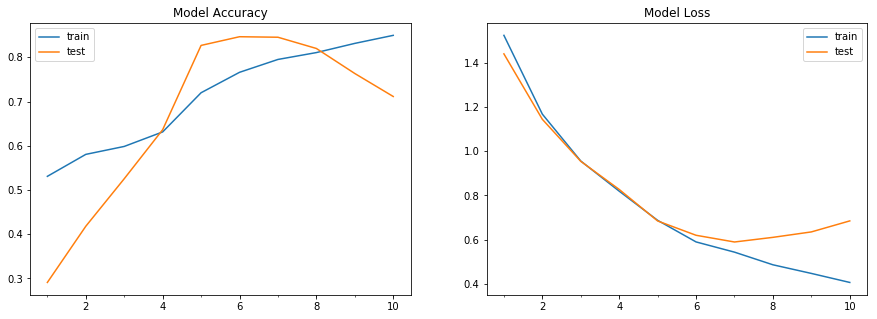

-----SMOTE-----
CNN-LSTM Accuracy Score ->  71.13163972286374
              precision    recall  f1-score   support

           0       0.90      0.76      0.82       760
           1       0.18      0.37      0.24       106

    accuracy                           0.71       866
   macro avg       0.54      0.56      0.53       866
weighted avg       0.81      0.71      0.75       866

[[577 183]
 [ 67  39]]


In [21]:
 
cvscores = []
for train, test in cv.split(token):  
    #print("TRAIN:", train, "Test:", test)
    Xtrain, Xtest = token[train], token[test]
    Ytrain, Ytest = y[train], y[test]
    #smote
    from imblearn.over_sampling import SMOTE
    sm = SMOTE(random_state=2)
    X_train_res, y_train_res = sm.fit_sample(Xtrain, Ytrain)    
    
    seed = 126
    np.random.seed(seed)
    model = Sequential()
    model.add(Embedding(vocab_size, 100, weights = [embedding_matrix], trainable=False, input_length = X_train_res.shape[1]))
    model.add(Conv1D(134, 5, activation='tanh'))
    model.add(MaxPooling1D(pool_size=3))
    model.add(Conv1D(114, 5, activation='tanh'))
    model.add(MaxPooling1D(pool_size=3))
    model.add(Dense(20, activation='tanh', kernel_regularizer = regularizers.l2(0.02)))
    model.add(Dropout(0.5))
    model.add(LSTM(94,return_sequences=True, activation='tanh'))#return_sequences=True
    model.add(Dropout(0.5))
    model.add(GlobalMaxPooling1D())
    model.add(Dropout(0.5))
    model.add(Dense(10,activation = 'tanh', kernel_regularizer = regularizers.l2(0.02)))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    print(model.summary())
    batch_size = 110
    epochs = 10
    
    model_history = model.fit(X_train_res, y_train_res, validation_data=(Xtest, Ytest), epochs=epochs, batch_size=batch_size, verbose=1 ,callbacks=[EarlyStopping(monitor='val_acc',patience=4, mode='max', min_delta = 0.001)])
    CLSTM = model.predict_classes(Xtest)
        
scores = model.evaluate(Xtest, Ytest, verbose=0)
cvscores.append(scores[1] * 100)
plot_model_history(model_history)
print("-----SMOTE-----")
print("CNN-LSTM Accuracy Score -> ", (np.mean(cvscores)))

print(classification_report(Ytest, CLSTM))
print(confusion_matrix(Ytest,CLSTM))


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_9 (Embedding)      (None, 2303, 100)         4123200   
_________________________________________________________________
conv1d_17 (Conv1D)           (None, 2299, 134)         67134     
_________________________________________________________________
max_pooling1d_17 (MaxPooling (None, 766, 134)          0         
_________________________________________________________________
conv1d_18 (Conv1D)           (None, 762, 114)          76494     
_________________________________________________________________
max_pooling1d_18 (MaxPooling (None, 254, 114)          0         
_________________________________________________________________
dense_25 (Dense)             (None, 254, 20)           2300      
_________________________________________________________________
dropout_25 (Dropout)         (None, 254, 20)           0         
__________

Train on 640 samples, validate on 866 samples
Epoch 1/10
640/640 [==============================] - 8s 12ms/step - loss: 1.7335 - acc: 0.4969 - val_loss: 1.7334 - val_acc: 0.1132
Epoch 2/10
640/640 [==============================] - 3s 5ms/step - loss: 1.6321 - acc: 0.5234 - val_loss: 1.5867 - val_acc: 0.3961
Epoch 3/10
640/640 [==============================] - 3s 5ms/step - loss: 1.5584 - acc: 0.5453 - val_loss: 1.6327 - val_acc: 0.1132
Epoch 4/10
640/640 [==============================] - 3s 5ms/step - loss: 1.5082 - acc: 0.5172 - val_loss: 1.5359 - val_acc: 0.2171
Epoch 5/10
640/640 [==============================] - 3s 5ms/step - loss: 1.4367 - acc: 0.5469 - val_loss: 1.4862 - val_acc: 0.2286
Epoch 6/10
640/640 [==============================] - 3s 5ms/step - loss: 1.3914 - acc: 0.5328 - val_loss: 1.4059 - val_acc: 0.2852
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_12 (Embedding)     

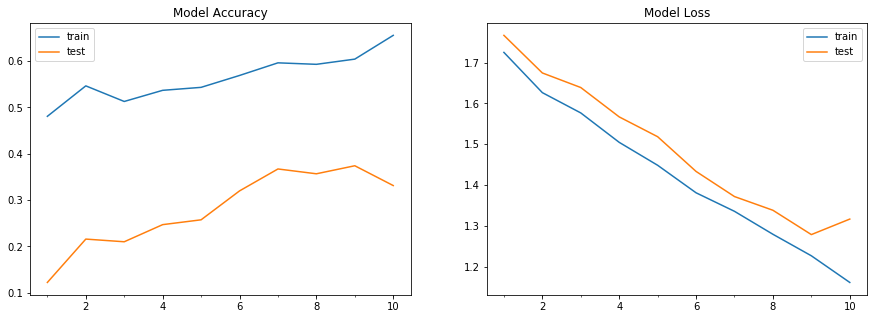

-----RandomUnderSampling-----
CNN-LSTM Accuracy Score ->  33.14087759815242
              precision    recall  f1-score   support

           0       0.93      0.26      0.40       760
           1       0.14      0.87      0.24       106

    accuracy                           0.33       866
   macro avg       0.54      0.56      0.32       866
weighted avg       0.84      0.33      0.38       866

[[195 565]
 [ 14  92]]


In [22]:
 
cvscores = []
for train, test in cv.split(token):  
    #print("TRAIN:", train, "Test:", test)
    Xtrain, Xtest = token[train], token[test]
    Ytrain, Ytest = y[train], y[test]
    #ramdomUnderSample
    from imblearn.under_sampling import RandomUnderSampler

    rus = RandomUnderSampler()
    x_rus, y_rus = rus.fit_sample(Xtrain, Ytrain)  
    
    seed = 126
    np.random.seed(seed)
    model = Sequential()
    model.add(Embedding(vocab_size, 100, weights = [embedding_matrix], trainable=False, input_length = x_rus.shape[1]))
    model.add(Conv1D(134, 5, activation='tanh'))
    model.add(MaxPooling1D(pool_size=3))
    model.add(Conv1D(114, 5, activation='tanh'))
    model.add(MaxPooling1D(pool_size=3))
    model.add(Dense(20, activation='tanh', kernel_regularizer = regularizers.l2(0.02)))
    model.add(Dropout(0.5))
    model.add(LSTM(94,return_sequences=True, activation='tanh'))#return_sequences=True
    model.add(Dropout(0.5))
    model.add(GlobalMaxPooling1D())
    model.add(Dropout(0.5))
    model.add(Dense(10,activation = 'tanh', kernel_regularizer = regularizers.l2(0.02)))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    print(model.summary())
    batch_size = 110
    epochs = 10
    
    model_history = model.fit(x_rus, y_rus, validation_data=(Xtest, Ytest), epochs=epochs, batch_size=batch_size, verbose=1 ,callbacks=[EarlyStopping(monitor='val_acc',patience=4, mode='max', min_delta = 0.001)])
    CLSTM = model.predict_classes(Xtest)
        
scores = model.evaluate(Xtest, Ytest, verbose=0)
cvscores.append(scores[1] * 100)
plot_model_history(model_history)
print("-----RandomUnderSampling-----")
print("CNN-LSTM Accuracy Score -> ", (np.mean(cvscores)))

print(classification_report(Ytest, CLSTM))
print(confusion_matrix(Ytest,CLSTM))


In [23]:
from sklearn.model_selection import StratifiedKFold
cv = StratifiedKFold(n_splits=4, random_state=42)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_13 (Embedding)     (None, 2303, 100)         4123200   
_________________________________________________________________
conv1d_25 (Conv1D)           (None, 2299, 134)         67134     
_________________________________________________________________
max_pooling1d_25 (MaxPooling (None, 766, 134)          0         
_________________________________________________________________
conv1d_26 (Conv1D)           (None, 762, 114)          76494     
_________________________________________________________________
max_pooling1d_26 (MaxPooling (None, 254, 114)          0         
_________________________________________________________________
dense_37 (Dense)             (None, 254, 20)           2300      
_________________________________________________________________
dropout_37 (Dropout)         (None, 254, 20)           0         
__________

Train on 2599 samples, validate on 865 samples
Epoch 1/10
2599/2599 [==============================] - 16s 6ms/step - loss: 1.3250 - acc: 0.8623 - mean_pred: 0.1430 - val_loss: 1.2067 - val_acc: 0.8798 - val_mean_pred: 0.2319
Epoch 2/10
2599/2599 [==============================] - 10s 4ms/step - loss: 1.0728 - acc: 0.8792 - mean_pred: 0.1200 - val_loss: 0.9829 - val_acc: 0.8798 - val_mean_pred: 0.2037
Epoch 3/10
2599/2599 [==============================] - 10s 4ms/step - loss: 0.8829 - acc: 0.8796 - mean_pred: 0.1243 - val_loss: 0.8205 - val_acc: 0.8798 - val_mean_pred: 0.2085
Epoch 4/10
2599/2599 [==============================] - 10s 4ms/step - loss: 0.7415 - acc: 0.8792 - mean_pred: 0.1322 - val_loss: 0.7018 - val_acc: 0.8798 - val_mean_pred: 0.2125
Epoch 5/10
2599/2599 [==============================] - 10s 4ms/step - loss: 0.6373 - acc: 0.8792 - mean_pred: 0.1246 - val_loss: 0.5984 - val_acc: 0.8798 - val_mean_pred: 0.1626
Epoch 6/10
2599/2599 [==============================] - 10

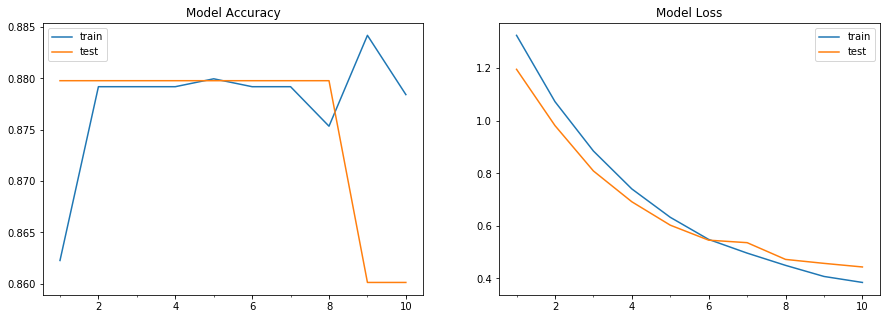

-----StratifiedKFold-----
CNN-LSTM Accuracy Score ->  86.01156069364163
              precision    recall  f1-score   support

           0       0.90      0.94      0.92       761
           1       0.37      0.24      0.29       104

    accuracy                           0.86       865
   macro avg       0.64      0.59      0.61       865
weighted avg       0.84      0.86      0.85       865

[[719  42]
 [ 79  25]]


In [24]:
 
cvscores = []
for train, test in cv.split(token,y):  
    #print("TRAIN:", train, "Test:", test)
    Xtrain, Xtest = token[train], token[test]
    Ytrain, Ytest = y[train], y[test]
     
    
    seed = 126
    np.random.seed(seed)
    model = Sequential()
    model.add(Embedding(vocab_size, 100, weights = [embedding_matrix], trainable=False, input_length = Xtrain.shape[1]))
    model.add(Conv1D(134, 5, activation='tanh'))
    model.add(MaxPooling1D(pool_size=3))
    model.add(Conv1D(114, 5, activation='tanh'))
    model.add(MaxPooling1D(pool_size=3))
    model.add(Dense(20, activation='tanh', kernel_regularizer = regularizers.l2(0.02)))
    model.add(Dropout(0.5))
    model.add(LSTM(94,return_sequences=True, activation='tanh'))#return_sequences=True
    model.add(Dropout(0.5))
    #model.add(LSTM(90,return_sequences=True, recurrent_dropout=0.6, activation='tanh'))#return_sequences=True
    #model.add(LSTM(100,return_sequences=True, recurrent_dropout=0.6, activation='tanh'))#return_sequences=True
    model.add(GlobalMaxPooling1D())
    model.add(Dropout(0.5))
    model.add(Dense(10,activation = 'tanh', kernel_regularizer = regularizers.l2(0.02)))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam',loss= 'binary_crossentropy',metrics=(['accuracy',mean_pred]))#sentropy',loss= imbalancedloss
    model.summary()
    
    batch_size = 110
    epochs = 10
        
    model_history = model.fit(Xtrain,Ytrain, validation_data=(Xtest, Ytest),epochs=epochs, batch_size=batch_size, verbose=1, callbacks=[EarlyStopping(monitor='val_loss',mode='min',patience=3,min_delta=0.01)])
    
    CLSTM = model.predict_classes(Xtest)
        
scores = model.evaluate(Xtest, Ytest, verbose=0)
cvscores.append(scores[1] * 100)
plot_model_history(model_history)
print("-----StratifiedKFold-----")
print("CNN-LSTM Accuracy Score -> ", (np.mean(cvscores)))

print(classification_report(Ytest, CLSTM))
print(confusion_matrix(Ytest,CLSTM))
